In [123]:
#Importo dependencias
import scipy
import pandas as pd
import numpy as np
import math

248 evaluations required.


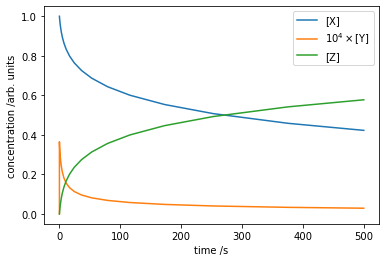

In [124]:
#EJEMPLO:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def deriv(t, y):
    """ODEs for Robertson's chemical reaction system."""
    x, y, z = y
    xdot = -0.04 * x + 1.e4 * y * z
    ydot = 0.04 * x - 1.e4 * y * z - 3.e7 * y**2
    zdot = 3.e7 * y**2
    return xdot, ydot, zdot

# Initial and final times.
t0, tf = 0, 500
# Initial conditions: [X] = 1; [Y] = [Z] = 0.
y0 = 1, 0, 0
# Solve, using a method resilient to stiff ODEs.
soln = solve_ivp(deriv, (t0, tf), y0, method='Radau')
print(soln.nfev, 'evaluations required.')

# Plot the concentrations as a function of time. Scale [Y] by 10**YFAC
# so its variation is visible on the same axis used for [X] and [Z].
YFAC = 4
plt.plot(soln.t, soln.y[0], label='[X]')
plt.plot(soln.t, 10**YFAC*soln.y[1], label=r'$10^{}\times$[Y]'.format(YFAC))
plt.plot(soln.t, soln.y[2], label='[Z]')
plt.xlabel('time /s')
plt.ylabel('concentration /arb. units')
plt.legend()
plt.show()

In [125]:
#Importo parámetros
#Parámetros de la evolución química del sistema
tmax = 1e5 #1.833973816e-010 // 1e5 //100e-6
R0 = 1e-6
Rmax = 1000e-6
T0 = 300
Tmax = 6000
sigmaT = 1e-6


#Parámetros químicos:
n_species = 5
n_reacc = 6
Na = 6.0221367e23 #defino el nro de avogadro

#Condiciones iniciales
#Orden:
#n[n_species] = {n[0],     n[1],   n[2],   n[3],   n[4],   n[5],   n[6],   n[7]}
#n[n_species] =      {H2,       H,      O,      O2,     OH,     H2O,    H2O2,   HO2}
#n0[n_species] = {0.0,   0.0,   0.5e8,    0.5e8,  0.0}
n0 = np.array([1.0e8,   0.0,    0.0,    1.0e8,  0.0])
#n0[n_species] = {1.0e8,   0.0,    0.0,    1.0e8,  0.0,    1.0e8,    0.0,    0.0}
#Masas:
#masa de H: 1,00784 u (unidad de masa atómica)
#masa de O: 15,999 u
masa_H = 1.00784
masa_O = 15.999
masa_species = np.array([2*masa_H, masa_H, masa_O, 2*masa_O, masa_H + masa_O])




#Gráfico R(t):
# import matplotlib.pyplot as plt
# import numpy as np
# t_array = np.linspace(0, tmax)
# R_array = R(t_array)
# plt.plot(t_array,R_array)

#Grafico T(t):
# import matplotlib.pyplot as plt
# import numpy as np
# t_array = np.linspace(0, 3*sigmaT)
# T_array = T(t_array)
# plt.plot(t_array,T_array)



In [126]:
#FUNCIONES QCAS

def R(t):
    return ((Rmax-R0)/tmax*t  + R0)

def V(t):
    return 4/3 * math.pi * R(t)**3

def dVdt(t):
    return 0
    #return 4*Pi*pow(R(t),2)*(Rmax-R0)/tmax;

def T(t):
    return (Tmax-T0)*np.exp(-0.5*pow(t/sigmaT,2)) + T0



In [127]:
#FUNCIONES MATH

def masa(n):
    m = 0.0
    for i in range(n_species):
        m = m + n[i]*masa_species[i]
    return m

def imprimir_nro_particulas(n_species,n,t, m0):
    print(t, "\t", n[0], "\t", n[1], "\t", n[2], "\t", n[3], "\t", n[4], "\t", masa(n)/m0)


In [128]:
#Calculo la masa inicial
m0 = masa(n0)

In [129]:
def reacciones(t, n, r):
    ntot = 0.0
    for i in range(n_species):
        ntot = ntot + n[i]

    MolCov=5.1e-29; #molecular covolumen [m^3]
    VolExcl=np.exp(ntot/V(t)*MolCov/(1.0-ntot/V(t)*MolCov))/(1.0-ntot/V(t)*MolCov)

    #Parametros de disociacion.
    #Son empleados para calcular los cambios debido a las reacciones. Creo que los que no están presentados son todos 0.
    t1=1.0
    t2=1.0
    t5=1.0
    t6=1.0
    t15=-1.0
    t16=1.0
    t33=-1.0
    t34=-1.0
    t39=1.0

    #Cargo las reacciones: par es forward, impar es backwards.

    #Reacción 1: 
    r[0]=pow(VolExcl,t1)*1.2e17*(1.0e-12)*(ntot/V(t))*(n[2]/V(t))*(n[2]/V(t))*pow(T(t),-1.0)*np.exp(-0.0/T(t))/Na/Na
    r[1]=3.16e19*(1.0e-6)*(ntot/V(t))*(n[3]/V(t))*pow(T(t),-1.3)*np.exp(-59893.0/T(t))/Na

    #Reacción 2:
    r[2]=pow(VolExcl,t2)*5.0e17*(1.0e-12)*(ntot/V(t))*(n[2]/V(t))*(n[1]/V(t))*pow(T(t),-1.0)*np.exp(-0.0/T(t))/Na/Na
    r[3]=3.54e17*(1.0e-6)*(ntot/V(t))*(n[4]/V(t))*pow(T(t),-0.9)*np.exp(-51217.0/T(t))/Na

    #Reacción 3:
    r[4]=3.87e4*(1.0e-6)*(n[2]/V(t))*(n[0]/V(t))*pow(T(t),2.7)*np.exp(-3150.0/T(t))/Na
    r[5]=1.79e4*(1.0e-6)*(n[1]/V(t))*(n[4]/V(t))*pow(T(t),2.7)*np.exp(-2200.0/T(t))/Na


def derivada(t, n):
    r = np.zeros(n_reacc)
    reacciones(t, n, r)
    dndt = np.zeros(n_species)
    # //Cálculo de dndt
    # //1 reacción:
    # dndt[0]=0
    # dndt[1]=0
    # dndt[2]=V(t)*(-2.0*(r[0]-r[1]))
    # dndt[3]=V(t)*(1.0*(r[0]-r[1]))
    # dndt[4]=0

    # //3 reacciones:
    dndt[0]=V(t)*(-1.0*(r[4]-r[5]))
    dndt[1]=V(t)*(-1.0*(r[2]-r[3])+1.0*(r[4]-r[5]))
    dndt[2]=V(t)*(-2.0*(r[0]-r[1])-1.0*(r[2]-r[3])-1.0*(r[4]-r[5]))
    dndt[3]=V(t)*(1.0*(r[0]-r[1]))
    dndt[4]=V(t)*(+1.0*(r[2]-r[3])+1.0*(r[4]-r[5]))

    # //Todas las reacciones que no involucran N (Nitrógeno):
    # //n[0] = y[Nvar2+1] =H2.
    # //n[1] = y[Nvar2+2] =H
    # //n[2] = y[Nvar2+3] =O
    # //n[3] = y[Nvar2+4] =O2
    # //n[4] = y[Nvar2+5] =OH
    # //n[5] = y[Nvar2+6] =H2O = y[4] = vapor
    # //n[6] = y[Nvar2+18] =H2O2. Este es mi n[6]
    # //n[7] = y[Nvar2+19] =HO2

    # // dndt[0]=V(t)*(-1.0*(r[4]-r[5])+1.0*(r[8]-r[9])-1.0*(r[12]-r[13])+1.0*(r[22]-r[23]));
    # // dndt[1]=V(t)*(-1.0*(r[2]-r[3])+1.0*(r[4]-r[5])-1.0*(r[6]-r[7])-2.0*(r[8]-r[9])-1.0*(r[10]-r[11])+1.0*(r[12]-r[13])-1.0*(r[20]-r[21])-1.0*(r[22]-r[23]));
    # // dndt[2]=V(t)*(-2.0*(r[0]-r[1])-1.0*(r[2]-r[3])-1.0*(r[4]-r[5])+1.0*(r[6]-r[7])+1.0*(r[14]-r[15])-1.0*(r[24]-r[24]));
    # // dndt[3]=V(t)*(1.0*(r[0]-r[1])-1.0*(r[6]-r[7])+1.0*(r[16]-r[17]));
    # // dndt[4]=V(t)*(+1.0*(r[2]-r[3])+1.0*(r[4]-r[5])+1.0*(r[6]-r[7])-1.0*(r[10]-r[11])-1.0*(r[12]-r[13])-2.0*(r[14]-r[15])+2.0*(r[18]-r[19])+1.0*(r[20]-r[21])+1.0*(r[24]-r[24]));
    # // dndt[5]=V(t)*(+1.0*(r[10]-r[11])+1.0*(r[12]-r[13])+1.0*(r[14]-r[15])+ 1.0*(r[20]-r[21])+1.0*(r[26]-r[27]));
    # // dndt[6]=V(t)*(-1.0*(r[18]-r[19])-1.0*(r[20]-r[21])-1.0*(r[22]-r[23])-1.0*(r[24]-r[24])-1.0*(r[26]-r[27])+1.0*(r[16]-r[17]));
    # // dndt[7]=V(t)*(-2.0*(r[16]-r[17])+1.0*(r[22]-r[23])+1.0*(r[24]-r[24])+1.0*(r[26]-r[27]));


    imprimir_nro_particulas(n_species,n,t, m0)
    return dndt




In [130]:


#Creo el vector de nro de partículas y lo inicializo
n = np.zeros(n_species)
for i in range(n_species):
    n[i] = n0[i]


t0=0.0; #Inicializacion del tiempo
    
#Creo el vector de dndt y lo inicializo
dndt = np.zeros(n_species)
dndt = derivada(t0, n)



    # //Creo el file en el que voy a ir guardando todo
    # ofstream file(archivo);
    # file << encabezado << endl;

imprimir_nro_particulas(n_species, n, t0, m0) #imprimo la cantidad inicial de partículas de cada especie
#step es el htry, es decir, el salto que (intenta hacer?) el rkqc.

#-------------------------------------------------------------------------------------------------------------------------
#SOLUCIÓN NUMÉRICA EMPLEANDO EL MÉTODO Radau
soln = solve_ivp(derivada, [t0, tmax], n0, method='Radau')
print(soln) #para obtener info. sobre cómo fue la integración numérica


0.0 	 100000000.0 	 0.0 	 0.0 	 100000000.0 	 0.0 	 1.0
0.0 	 100000000.0 	 0.0 	 0.0 	 100000000.0 	 0.0 	 1.0
0.0 	 100000000.0 	 0.0 	 0.0 	 100000000.0 	 0.0 	 1.0
4.981999378781965e-20 	 100000000.0 	 0.0 	 1.4142135623589532e-05 	 99999999.99999292 	 0.0 	 1.0
0.0 	 100000001.49011612 	 0.0 	 0.0 	 100000000.0 	 0.0 	 1.0000000008830556
0.0 	 100000000.0 	 1.4901161193847656e-14 	 0.0 	 100000000.0 	 0.0 	 1.0
0.0 	 100000000.0 	 0.0 	 1.4901161193847656e-14 	 100000000.0 	 0.0 	 1.0
0.0 	 100000000.0 	 0.0 	 0.0 	 99999998.50988388 	 0.0 	 0.9999999859818944
0.0 	 100000000.0 	 0.0 	 0.0 	 100000000.0 	 1.4901161193847656e-14 	 1.0
7.724641138249273e-19 	 100000000.0 	 0.0 	 0.0 	 100000000.0 	 0.0 	 1.0
3.2131353892006447e-18 	 100000000.0 	 0.0 	 0.0 	 100000000.0 	 0.0 	 1.0
4.981999378781965e-18 	 100000000.0 	 0.0 	 0.0 	 100000000.0 	 0.0 	 1.0
7.724641138249273e-19 	 100000000.0 	 1.2209938531576752e-12 	 0.00021927526343308953 	 99999999.99989036 	 1.2209938531562983e-12

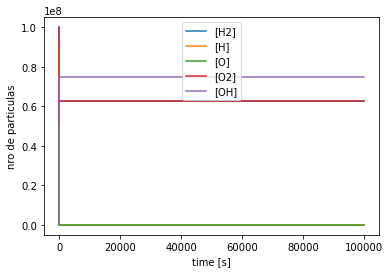

In [133]:
plt.plot(soln.t, soln.y[0], label='[H2]')
plt.plot(soln.t, soln.y[1], label='[H]')
plt.plot(soln.t, soln.y[2], label='[O]')
plt.plot(soln.t, soln.y[3], label='[O2]')
plt.plot(soln.t, soln.y[4], label='[OH]')
plt.xlabel('time [s]')
plt.ylabel('nro de particulas')
plt.legend()
plt.show()

In [132]:
#Resuelvo el sistema de ec. diff:
import scipy
from scipy.integrate import solve_ivp

#sol = solve_ivp(ecuaciones_diferenciales, [0, 1e-22], [0,1e4, 0, 0, 2], method = 'RK45', max_step = 1e-24)
sol = solve_ivp(ecuaciones_diferenciales, [0, 1], [0,1e4, 0, 0, 2], method = 'Radau')
#Hay un problema cuando el paso es grande. Entiendo que hay errores durante el método que producen partículas negativas.


#print(sol.y[1])
import matplotlib.pyplot as plt
plt.plot(sol.t,sol.y[0])
#plt.plot(sol.t,sol.y[1] + sol.y[0])
plt.show()

for i in range(200):
    print(sol.t[i], "\t",sol.y[0][i], "\t", sol.y[1][i], sol.y[2][i], sol.y[3][i], sol.y[4][i])

TypeError: reacciones() missing 1 required positional argument: 'r'

In [ ]:
reacciones(0,[0,1, 0, 0, 0])

array([ 1.78894682e-35, -1.78894682e-35,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00])

In [ ]:
for i in range(20):
    print(sol.t[i], "\t",sol.y[0][i], "\t", sol.y[1][i], "\t", sol.y[2][i],)

0.0 	 0.0 	 10000.0 	 0.0
1e-24 	 -1.703975441218108e-45 	 10000.00000000003 	 1.703975441218108e-45
1.0583321164659624e-24 	 -2.5743683220424536e-12 	 10000.000000000031 	 2.574368323873429e-12
1.0583328631170532e-24 	 -5.3459579304384195e-09 	 10000.000000001246 	 1.669302320005806e-08
1.0583330124472713e-24 	 2.450137364127838e-08 	 9999.99999998922 	 1.6390574727303236e-08
1.0583331096040915e-24 	 -3.518962365600859e-08 	 9999.999999990232 	 -2.5330881465245478e-08
1.0583332067609117e-24 	 -3.690739205468513e-07 	 10000.000000033711 	 -5.407912701806331e-07
1.0583332125743273e-24 	 -6.087981479700802e-06 	 10000.000001154607 	 -5.387669113798775e-06
1.0583332127963889e-24 	 -1.2305368919404464e-05 	 10000.000002522751 	 -1.0300580895275908e-05
1.0583332129151878e-24 	 -2.6074468149492623e-05 	 10000.00000565389 	 -2.100878933121159e-05
1.0583332129544552e-24 	 -4.09005952791871e-05 	 10000.00000908444 	 -3.244727245462972e-05
1.0583332129937226e-24 	 -9.332737009538115e-05 	 10000.